<a href="https://colab.research.google.com/github/atoder/stock-prediction-3-models/blob/master/Finance_Week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task

-- Create a reinforcement learning agent to predict stock prices

- import dependencies
- import dataset
- define agent algorithm
- make predictions
- plot predictions

---


In [0]:
!pip install yfinance --upgrade -- no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=36b1be9cca6bac23535295d342af76ff10c35107d067b4cb193e2382a799ef04
  Stored in directory: /tmp/pip-ephem-wheel-cache-zmtbm906/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


Mounted at /drive/


## - import dependencies + import dataset

In [0]:
#matrix math and data pre-processing
import numpy as np

#for data 
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


#Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

#Modeling Metrics
from sklearn import metrics


# reads data from csv file
from pandas_datareader import data as pdr
# downloads yahoo data directly
import fix_yahoo_finance as yf

yf.pdr_override()

# Import Data 
df_full = pdr.get_data_yahoo('JPM',start="2018-08-01").reset_index()
df_full.to_csv('JPM2.csv', index=False)

#Mount folder to save and retrieve data into .csv
from google.colab import drive
drive.mount('/drive/', force_remount=True)

# rows by cols
df_full.shape

[*********************100%***********************]  1 of 1 downloaded


In [0]:


df_full.head(40)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-01,115.750000,116.690002,115.279999,115.660004,112.270470,13531600
1,2018-08-02,114.570000,116.250000,114.330002,116.150002,112.746109,11058100
2,2018-08-03,116.000000,117.129997,115.940002,117.089996,113.658554,11016100
3,2018-08-06,116.790001,117.529999,116.180000,117.120003,113.687683,9857400
4,2018-08-07,117.739998,118.290001,117.330002,117.550003,114.105087,10562100
5,2018-08-08,117.330002,118.269997,117.279999,117.790001,114.338051,8997100
6,2018-08-09,117.510002,117.720001,116.699997,116.879997,113.454704,9694200
7,2018-08-10,115.500000,115.949997,114.680000,115.730003,112.338417,12630600
8,2018-08-13,115.559998,115.879997,113.820000,113.889999,110.552330,10336300
9,2018-08-14,114.269997,115.040001,113.650002,114.650002,111.290070,10597600


In [0]:

df_full.describe

<bound method NDFrame.describe of           Date        Open        High  ...       Close   Adj Close    Volume
0   2018-08-01  115.750000  116.690002  ...  115.660004  112.270470  13531600
1   2018-08-02  114.570000  116.250000  ...  116.150002  112.746109  11058100
2   2018-08-03  116.000000  117.129997  ...  117.089996  113.658554  11016100
3   2018-08-06  116.790001  117.529999  ...  117.120003  113.687683   9857400
4   2018-08-07  117.739998  118.290001  ...  117.550003  114.105087  10562100
5   2018-08-08  117.330002  118.269997  ...  117.790001  114.338051   8997100
6   2018-08-09  117.510002  117.720001  ...  116.879997  113.454704   9694200
7   2018-08-10  115.500000  115.949997  ...  115.730003  112.338417  12630600
8   2018-08-13  115.559998  115.879997  ...  113.889999  110.552330  10336300
9   2018-08-14  114.269997  115.040001  ...  114.650002  111.290070  10597600
10  2018-08-15  113.820000  114.330002  ...  113.699997  110.367912  10152100
11  2018-08-16  114.349998  11

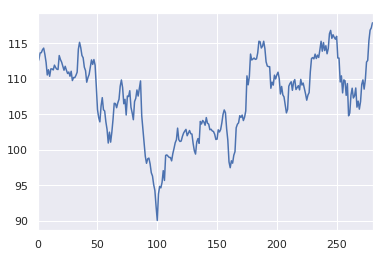

In [0]:
df_full['Adj Close'].plot()

# Data Preproccessing

In [0]:
# reset index - Data Preproccessing
df_full.set_index("Date", inplace=True)

In [0]:
df_full.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,115.750000,116.690002,115.279999,115.660004,112.270470,13531600
2018-08-02,114.570000,116.250000,114.330002,116.150002,112.746109,11058100
2018-08-03,116.000000,117.129997,115.940002,117.089996,113.658554,11016100
2018-08-06,116.790001,117.529999,116.180000,117.120003,113.687683,9857400
2018-08-07,117.739998,118.290001,117.330002,117.550003,114.105087,10562100


In [0]:
window_size=32
num_samples=len(df_full)-window_size

# Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)


data = df_full['Adj Close'].values[indices] # Create the 2D matrix of training samples
x = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day

In [0]:
x



array([[112.27047 , 112.746109, 113.658554, ..., 109.766075, 110.193184,
        110.173767],
       [112.746109, 113.658554, 113.687683, ..., 110.193184, 110.173767,
        110.503807],
       [113.658554, 113.687683, 114.105087, ..., 110.173767, 110.503807,
        110.950317],
       ...,
       [115.709999, 116.220001, 115.849998, ..., 112.370003, 112.610001,
        115.400002],
       [116.220001, 115.849998, 115.589996, ..., 112.610001, 115.400002,
        116.870003],
       [115.849998, 115.589996, 116.      , ..., 115.400002, 116.870003,
        117.190002]])

In [0]:
y


array([110.503807, 110.950317, 114.173035, 115.153419, 114.396286,
       113.2994  , 112.97908 , 111.649223, 111.163872, 109.533104,
       110.173767, 110.62999 , 111.66864 , 112.675446, 112.040085,
       112.724319, 111.942329, 108.960983, 105.696159, 104.542717,
       103.946442, 106.175133, 107.357903, 105.657059, 105.48111 ,
       103.966003, 102.880989, 100.965103, 102.499771, 101.092171,
       102.48999 , 104.298347, 106.566116, 106.527031, 105.940529,
       106.634544, 107.133072, 108.970764, 109.850502, 108.785027,
       106.497704, 107.123291, 104.914169, 107.592499, 107.514297,
       108.335388, 106.008949, 105.217186, 104.249474, 106.800728,
       107.250374, 108.442917, 107.582718, 108.687286, 109.713646,
       104.816422, 102.822342, 100.965103,  99.078545,  98.110832,
        98.746193,  98.843941,  98.032631,  96.781433,  96.322014,
        95.100151,  94.279053,  92.050377,  90.066071,  93.800095,
        94.855774,  94.650513,  95.422729,  97.074684,  95.695

In [0]:
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [0]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [0]:
y_test.shape


(50,)

In [0]:
x_test.shape

## Modeling

In [0]:
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
  
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

#**Linear Regression**

Mean Absolute Error: 1.3915
Mean Squared Error: 3.0966
Root Mean Squared Error: 1.7597
Mean Absolute Error: 1.3915
Mean Squared Error: 3.0966
Root Mean Squared Error: 1.7597


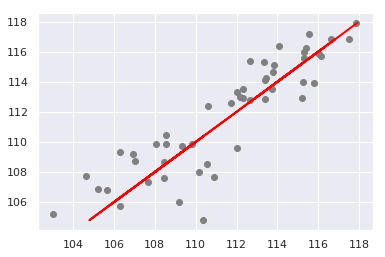

In [0]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)
y_pred_lr=model_lr.predict(x_test)
get_performance(y_pred_lr)
get_plot(y_pred_lr)
get_performance(y_pred_lr)

# Method #1- Ridge Regression¶


Mean Absolute Error: 1.3873
Mean Squared Error: 3.0709
Root Mean Squared Error: 1.7524


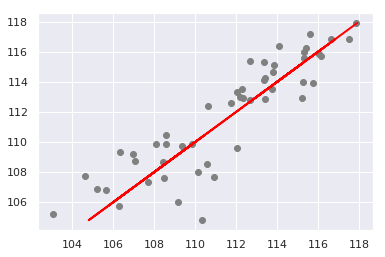

In [0]:

model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

#generate predictions
y_pred_ridge=model_ridge.predict(x_test)
get_performance(y_pred_ridge)
get_plot(y_pred_ridge)